### Deep Learning - Deep Neural Network (TF + Keras)

#### Problem: Regression

In [1]:
# Data set: Housing Sale dataset -- predict price 

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [4]:
from sklearn.metrics import mean_squared_error

In [6]:
from tensorflow.keras import models # Sequential 
from tensorflow.keras import layers # Dense, Dropout, ... 

In [7]:
df = pd.read_csv("dl_datasets_1/kc_house_data.csv")

In [8]:
# EDA ... 

In [9]:
# Explore 
# Handel Missing values 
# Visualization 
# Correlation 
# Outliers

In [10]:
type(df)

pandas.core.frame.DataFrame

In [12]:
df.shape

(21597, 21)

In [13]:
# 21597 -- observations
# 21    -- Variables/Domains/Columns

In [25]:
# df.dtypes

In [22]:
# df.info()

In [23]:
# df.isnull().sum()

In [24]:
# No Null Values

<AxesSubplot:>

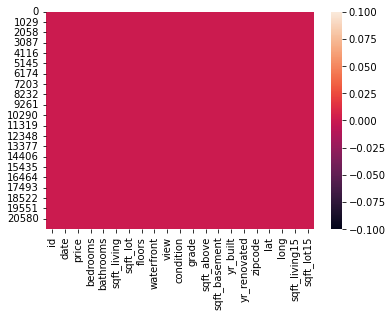

In [18]:
# Through Heat Map -- Null values 
sns.heatmap(df.isnull())

In [26]:
# df.describe().T

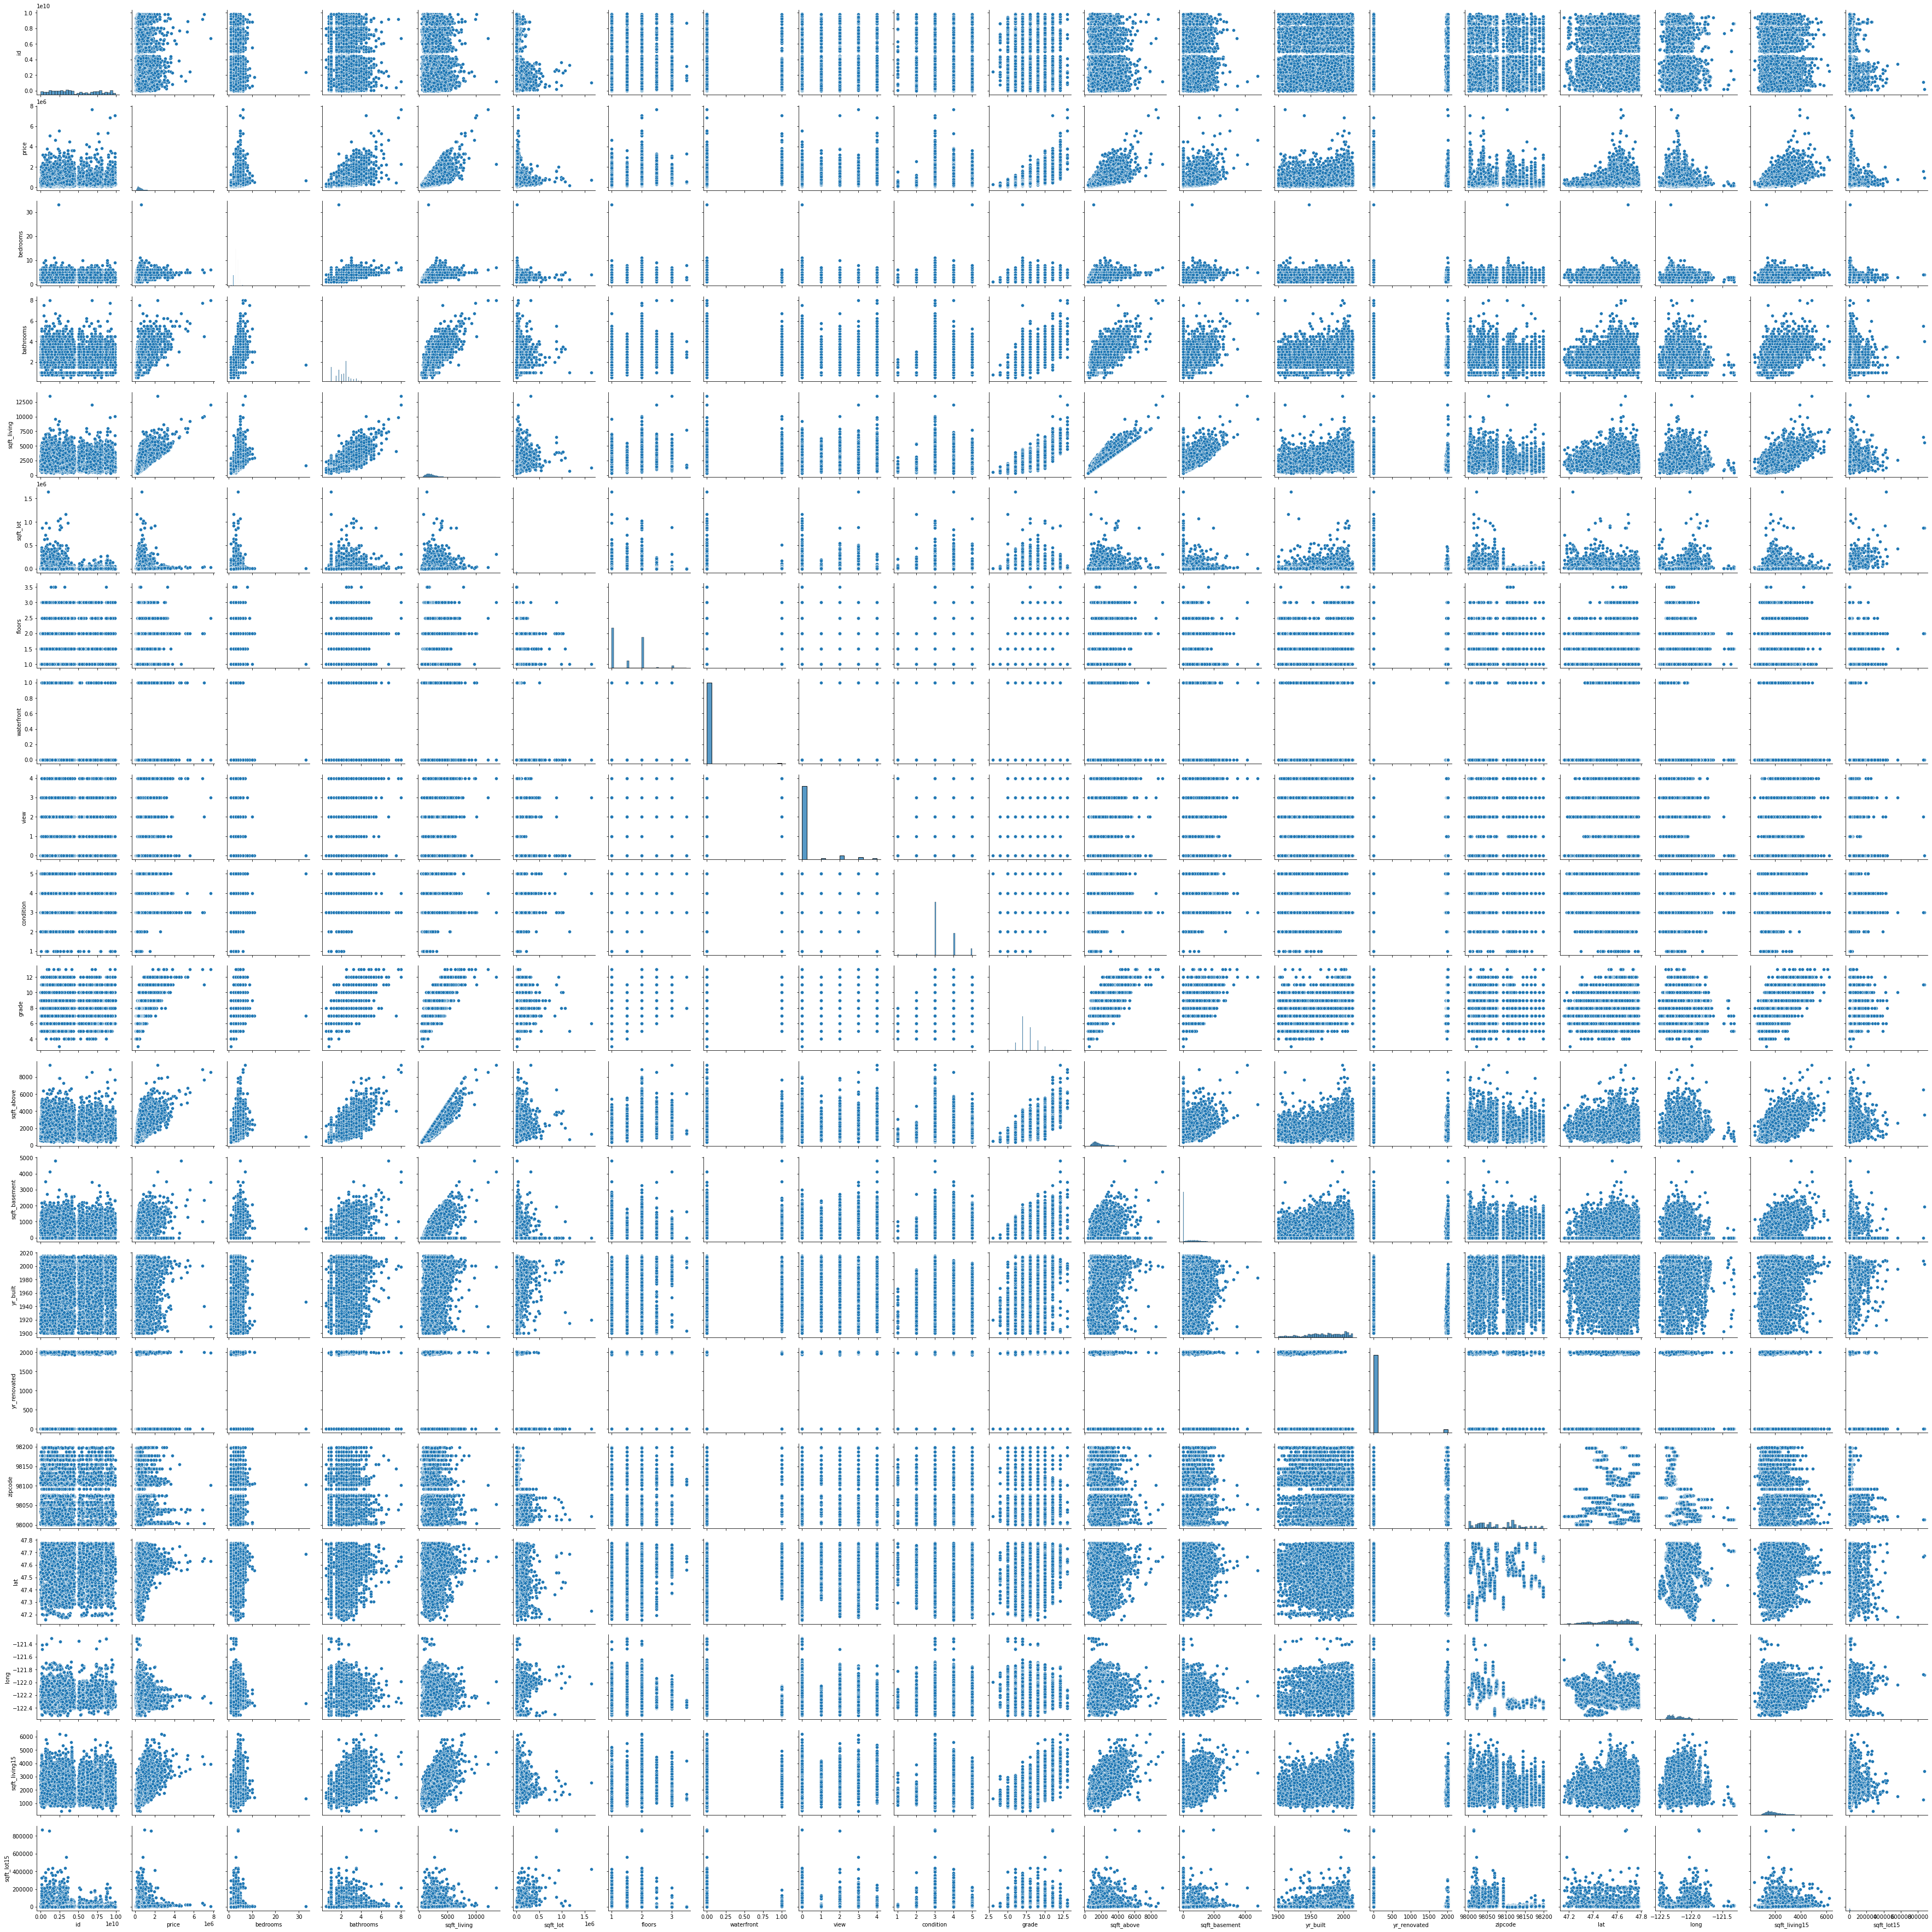

In [21]:
sns.pairplot(df)

<Figure size 720x576 with 0 Axes>

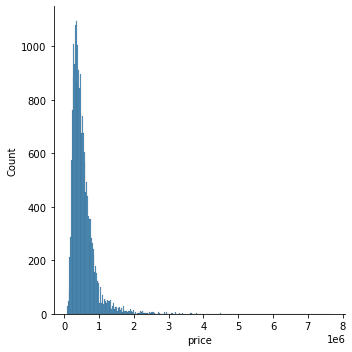

In [33]:
plt.figure(figsize=(10,8))
sns.displot(x = df["price"])
plt.show()

<AxesSubplot:xlabel='bedrooms', ylabel='count'>

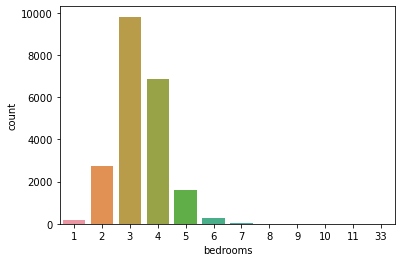

In [36]:
sns.countplot(x = 'bedrooms', data = df)

In [39]:
df.corr()['price'].sort_values()

zipcode         -0.053402
id              -0.016772
long             0.022036
condition        0.036056
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.126424
floors           0.256804
waterfront       0.266398
lat              0.306692
bedrooms         0.308787
sqft_basement    0.323799
view             0.397370
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

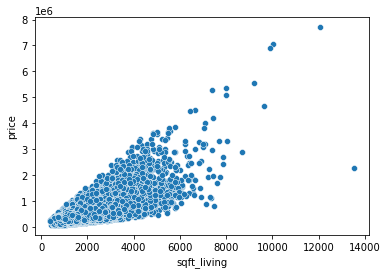

In [40]:
sns.scatterplot(x='sqft_living', y = 'price', data = df)

In [42]:
# sns.scatterplot(x='zipcode', y = 'price', data = df)

In [46]:
df.sort_values(by = "price", ascending = False).head(300)

id        date      price  bedrooms  bathrooms  sqft_living  \
7245   6762700020  10/13/2014  7700000.0         6       8.00        12050   
3910   9808700762   6/11/2014  7060000.0         5       4.50        10040   
9245   9208900037   9/19/2014  6890000.0         6       7.75         9890   
4407   2470100110    8/4/2014  5570000.0         5       5.75         9200   
1446   8907500070   4/13/2015  5350000.0         5       5.00         8000   
...           ...         ...        ...       ...        ...          ...   
14295  3528000040   3/26/2015  1800000.0         3       3.25         5290   
13838  5461300150  12/11/2014  1800000.0         5       2.75         2880   
8775   3343302110    3/6/2015  1800000.0         3       3.00         2790   
11272  5078400160    6/5/2014  1800000.0         5       4.50         4400   
21132   524059063    5/6/2014  1800000.0         5       5.00         4490   

       sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
7245      27600     2.5           0     3  ...     13        8570   
3910      37325     2.0           1     2  ...     11        7680   
9245      31374     2.0           0     4  ...     13        8860   
4407      35069     2.0           0     0  ...     13        6200   
1446      23985     2.0           0     4  ...     12        6720   
...         ...     ...         ...   ...  ...    ...         ...   
14295    224442     2.0           0     0  ...     11        4540   
13838     20274     1.0           0     3  ...      9        1660   
8775      13295     2.0           1     4  ...     10        2370   
11272     15580     2.0           0     0  ...     11        3390   
21132     10279     2.0           0     0  ...     10        3930   

       sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
7245            3480      1910          1987    98102  47.6298 -122.323   
3910            2360      1940          2001    98004  47.6500 -122.214   
9245            1030      2001             0    98039  47.6305 -122.240   
4407            3000      2001             0    98039  47.6289 -122.233   
1446            1280      2009             0    98004  47.6232 -122.220   
...              ...       ...           ...      ...      ...      ...   
14295            750      1988             0    98053  47.6671 -122.051   
13838           1220      1959             0    98004  47.6267 -122.222   
8775             420      1933          1989    98006  47.5466 -122.197   
11272           1010      2003             0    98004  47.6232 -122.207   
21132            560      2013             0    98004  47.5974 -122.202   

       sqft_living15  sqft_lot15  
7245            3940        8800  
3910            3930       25449  
9245            4540       42730  
4407            3560       24345  
1446            4600       21750  
...              ...         ...  
14295           3750       84936  
13838           3750       20220  
8775            3140       11949  
11272           2150       14249  
21132           2490       10279  

[300 rows x 21 columns]

In [47]:
len(df) * 0.01

215.97

In [58]:
new_data = df.sort_values(by = "price", ascending = False).iloc[216:] # clipping concept (According to target column)

<Figure size 720x576 with 0 Axes>

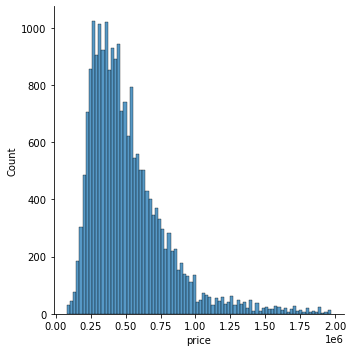

In [57]:
plt.figure(figsize=(10,8))
sns.displot(x = new_data['price'])
plt.show()

In [60]:
# new data length

len(new_data)

21381

In [61]:
new_data.drop(["id", "zipcode"], axis = 1, inplace=True)

In [62]:
new_data['date'].dtype

dtype('O')

In [65]:
new_data['date'] = pd.to_datetime(new_data['date'])

In [67]:
new_data.dtypes

date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

In [68]:
new_data['year'] = new_data['date'].apply(lambda date: date.year)

In [69]:
new_data['month'] = new_data['date'].apply(lambda date: date.month)

In [70]:
new_data.drop("date", axis = 1, inplace = True)

In [71]:
new_data

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
6329   1970000.0         4       3.50         4370      8510     2.0   
12271  1960000.0         5       4.50         6200     23373     3.0   
9166   1960000.0         3       1.75         3330     12566     1.0   
12565  1960000.0         4       4.00         4430     31353     2.0   
1150   1960000.0         4       2.75         3120      7898     1.0   
...          ...       ...        ...          ...       ...     ...   
2139     82500.0         2       1.00          520     22334     1.0   
8267     82000.0         3       1.00          860     10426     1.0   
16184    81000.0         2       1.00          730      9975     1.0   
465      80000.0         1       0.75          430      5050     1.0   
15279    78000.0         2       1.00          780     16344     1.0   

       waterfront  view  condition  grade  sqft_above  sqft_basement  \
6329            0     1          3     10        3610            760   
12271           0     1          4     11        5050           1150   
9166            1     4          4      8        1940           1390   
12565           0     0          3     12        4430              0   
1150            1     4          4      8        1560           1560   
...           ...   ...        ...    ...         ...            ...   
2139            0     0          2      5         520              0   
8267            0     0          3      6         860              0   
16184           0     0          1      5         730              0   
465             0     0          2      4         430              0   
15279           0     0          1      5         780              0   

       yr_built  yr_renovated      lat     long  sqft_living15  sqft_lot15  \
6329       2003             0  47.5876 -122.204           2960       10347   
12271      1988             0  47.5632 -122.215           3700       14486   
9166       1960             0  47.5287 -122.220           3730       16560   
12565      1998             0  47.6422 -122.157           3900       35237   
1150       1963             0  47.7165 -122.259           2630       13868   
...         ...           ...      ...      ...            ...         ...   
2139       1951             0  47.4799 -122.296           1572       10570   
8267       1954             0  47.4987 -122.341           1140       11250   
16184      1943             0  47.4808 -122.315            860        9000   
465        1912             0  47.6499 -121.909           1200        7500   
15279      1942             0  47.4739 -122.280           1700       10387   

       year  month  
6329   2014      6  
12271  2014     10  
9166   2015      2  
12565  2015      4  
1150   2015      4  
...     ...    ...  
2139   2014      5  
8267   2014     11  
16184  2015      3  
465    2014      5  
15279  2014      5  

[21381 rows x 20 columns]

In [79]:
 avg = new_data.groupby(by = "month").mean()['price']

In [82]:
avg # avg price in every month 

month
1     504981.466942
2     493269.607114
3     523761.809164
4     541452.515165
5     522940.482570
6     533429.116009
7     526694.006390
8     511327.311946
9     507255.324601
10    519494.580247
11    499781.279770
12    503406.086598
Name: price, dtype: float64

<AxesSubplot:xlabel='month'>

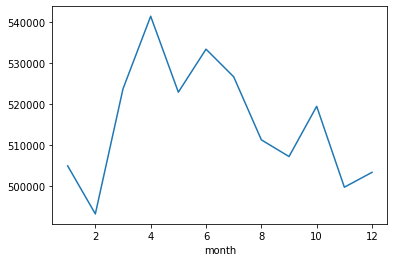

In [83]:
avg.plot()

In [118]:
# Extracting Features

X = new_data.drop("price", axis = 1).values
y = new_data.iloc[:,0].values

In [119]:
from sklearn.model_selection import train_test_split

In [120]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.33, random_state=42)

In [121]:
sc = MinMaxScaler() 

In [122]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [123]:
# Define Neural Network

model = models.Sequential()

#Hidding layer
model.add(layers.Dense(units = 19, activation='relu'))
model.add(layers.Dense(units = 10, activation='relu'))
model.add(layers.Dense(units = 10, activation='relu'))
#Output Layer
model.add(layers.Dense(units = 1))

In [124]:
# Compiling Models

model.compile(optimizer='adam', loss = 'mse')

In [125]:
model.fit(X_train, y_train, epochs = 100, validation_data=(X_test, y_test))

Epoch 1/100
448/448 [==============================] - 2s 2ms/step - loss: 350736842752.0000 - val_loss: 344908759040.0000
Epoch 2/100
448/448 [==============================] - 1s 2ms/step - loss: 335744303104.0000 - val_loss: 305841111040.0000
Epoch 3/100
448/448 [==============================] - 1s 2ms/step - loss: 258816065536.0000 - val_loss: 187286732800.0000
Epoch 4/100
448/448 [==============================] - 1s 3ms/step - loss: 132056408064.0000 - val_loss: 75090092032.0000
Epoch 5/100
448/448 [==============================] - 1s 2ms/step - loss: 63716614144.0000 - val_loss: 53258395648.0000
Epoch 6/100
448/448 [==============================] - 1s 2ms/step - loss: 54645096448.0000 - val_loss: 52549373952.0000
Epoch 7/100
448/448 [==============================] - 1s 2ms/step - loss: 53368082432.0000 - val_loss: 51746316288.0000
Epoch 8/100
448/448 [==============================] - 1s 2ms/step - loss: 52172603392.0000 - val_loss: 50302693376.0000
Epoch 9/100
448/448 [====

In [116]:
loss_df = pd.DataFrame(model.history.history)

<AxesSubplot:>

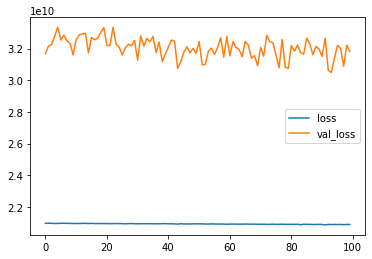

In [117]:
loss_df.plot()